In [1]:
%matplotlib inline  
import numpy as np
import matplotlib.pyplot as plt

In [2]:
size = 5

x = np.arange(-size, size, 0.1)

delta = np.random.normal(5, 4.5, size=(100,))

y = 0.5*x**3 - 2.5*x**2 + x + 2 + delta

In [9]:
len(x)

100

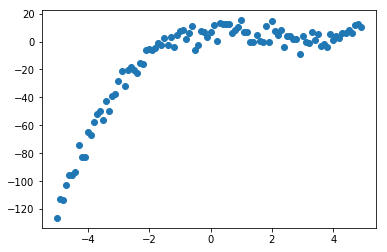

In [3]:
plt.scatter(x, y);

In [4]:
from auxein.population import build_variable_dimension_population
from auxein.playgrounds import Static
from auxein.fitness import SimplePolynomialRegression
from auxein.mutations import SelfAdaptiveSingleStep
from auxein.recombinations import SimpleArithmetic
from auxein.parents.distributions import SigmaScaling
from auxein.parents.selections import StochasticUniversalSampling
from auxein.replacements import ReplaceWorst

In [35]:
fitness_function = SimplePolynomialRegression(x.reshape(len(x), 1), y)
population = build_variable_dimension_population(100, fitness_function)
playground = Static(
    population = population,
    fitness = fitness_function,
    mutation = SelfAdaptiveSingleStep(0.05),
    distribution = SigmaScaling(),
    selection = StochasticUniversalSampling(offspring_size = 2),
    recombination = SimpleArithmetic(alpha = 0.5, allow_uneven = True),
    replacement = ReplaceWorst(offspring_size = 2)
)
stats = playground.train(50)

INFO:root:Starting evolution cycle with a maximum of 50 generations
DEBUG:root:0/50 -- average_fitness: -23443202213.085865
DEBUG:root:1/50 -- average_fitness: -10963281043.416647
DEBUG:root:2/50 -- average_fitness: -8330754740.34842
DEBUG:root:3/50 -- average_fitness: -4805789111.108706
DEBUG:root:4/50 -- average_fitness: -3158190460.0189815
DEBUG:root:5/50 -- average_fitness: -4384792635.368573
DEBUG:root:6/50 -- average_fitness: -1485462068.417818
DEBUG:root:7/50 -- average_fitness: -811237956.7557772
DEBUG:root:8/50 -- average_fitness: -406706785.03502756
DEBUG:root:9/50 -- average_fitness: -201717561.84496528
DEBUG:root:10/50 -- average_fitness: -154688278.2850693
DEBUG:root:11/50 -- average_fitness: -121099568.02477723
DEBUG:root:12/50 -- average_fitness: -91235277.36364816
DEBUG:root:13/50 -- average_fitness: -65059430.06356872
DEBUG:root:14/50 -- average_fitness: -42487662.180181675
DEBUG:root:15/50 -- average_fitness: -26324999.368956223
DEBUG:root:16/50 -- average_fitness: -1

In [36]:
population.get_stats()

{'generation_count': 50,
 'size': 100,
 'mean_age': 23.65946061372757,
 'std_age': 2.3378564718422123,
 'max_age': 25.982707262039185,
 'min_age': 19.36496353149414,
 'mean_fitness': -174768.014397686,
 'min_fitness': -5345440.100321769,
 'max_fitness': -12268.277788407191,
 'std_fitness': 520970.4142069336}

In [37]:
coeff = playground.get_most_performant().genotype.dna
coeff

array([ 0.29324162, -1.74550356,  1.79619154,  0.86193267])

In [38]:
y_pred = np.polyval(coeff, x)

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


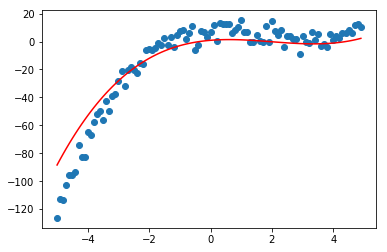

In [39]:
plt.scatter(x, y);
plt.plot(x, y_pred, color='red');

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


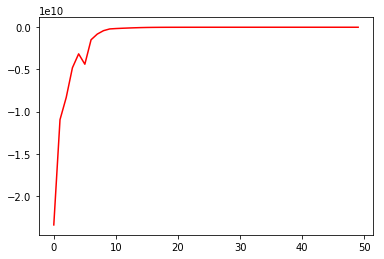

In [40]:
plt.plot(stats['generation'], stats['mean_fitness'], color='red');